In [92]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('adult.csv', na_values='?')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


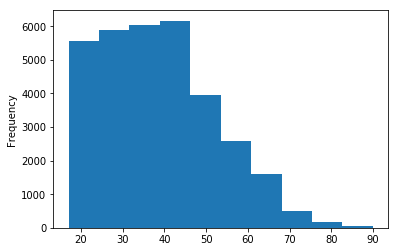

In [15]:
data['age'].plot(kind='hist')

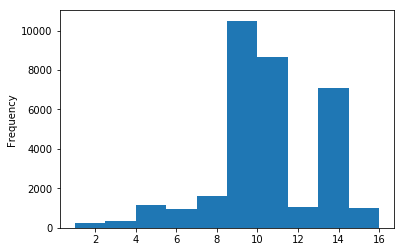

In [17]:
data['education.num'].plot(kind='hist')

In [22]:
data[data['education.num'] == 10]['education']

2        Some-college
4        Some-college
9        Some-college
23       Some-college
30       Some-college
42       Some-college
48       Some-college
49       Some-college
53       Some-college
56       Some-college
57       Some-college
62       Some-college
80       Some-college
83       Some-college
92       Some-college
107      Some-college
125      Some-college
126      Some-college
131      Some-college
137      Some-college
147      Some-college
150      Some-college
152      Some-college
164      Some-college
166      Some-college
168      Some-college
180      Some-college
184      Some-college
185      Some-college
190      Some-college
             ...     
32403    Some-college
32406    Some-college
32407    Some-college
32408    Some-college
32417    Some-college
32421    Some-college
32422    Some-college
32424    Some-college
32427    Some-college
32431    Some-college
32453    Some-college
32454    Some-college
32461    Some-college
32462    Some-college
32463    S

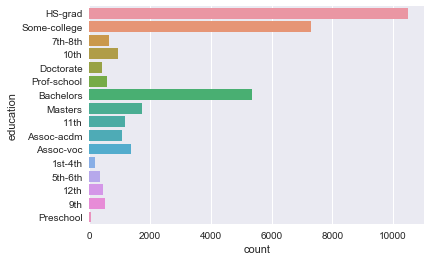

In [27]:
sns.countplot(y='education', data=data)

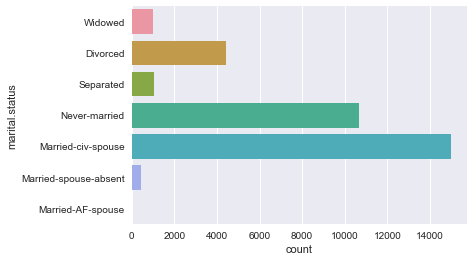

In [29]:
sns.countplot(y='marital.status', data=data)

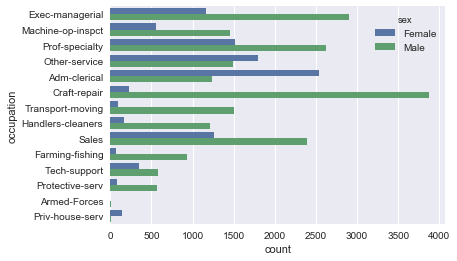

In [39]:
sns.countplot(y='occupation', hue='sex', data=data)

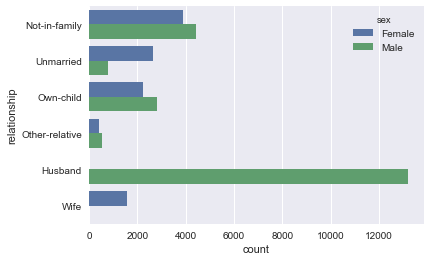

In [37]:
sns.countplot(y='relationship', hue='sex', data=data)

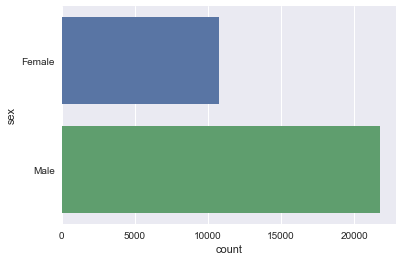

In [40]:
sns.countplot(y='sex', data=data)

In [44]:
data.dropna(inplace=True)

In [95]:
columns = ['age', 'workclass', 'education.num',
       'marital.status', 'occupation', 'relationship',
       'capital.gain', 'capital.loss', 'hours.per.week']
X = data[columns]
Y = (data['income'] == '<=50K')

In [96]:
categorical = ['workclass', 'marital.status', 'occupation', 'relationship']

In [97]:
X_ = pd.get_dummies(X, columns=categorical)
print(X_.shape)
X_.head()

(30162, 39)


,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
1,82,9,0,4356,18,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,54,4,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,9,0,3770,45,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,38,6,0,3770,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
print(Y.shape)
Y.sum()

(30162,)


22654

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_, Y, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print('{}, std: {}'.format(scores.mean(), scores.std()))

0.7592752798686476, std: 0.10509323329542188


In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_l = X.copy()
for c in categorical:
    X_l[c] = le.fit_transform(X[c])
X_l.head()

,age,workclass,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week
1,82,2,9,6,3,1,0,4356,18
3,54,2,4,0,6,4,0,3900,40
4,41,2,10,5,9,3,0,3900,40
5,34,2,9,0,7,4,0,3770,45
6,38,2,6,5,0,4,0,3770,40


In [101]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
scores = cross_val_score(clf, X_, Y, cv=StratifiedKFold(n_splits=5), scoring='roc_auc')
print('{}, std: {}'.format(scores.mean(), scores.std()))

0.8483363382670168, std: 0.022981105467323657


In [102]:
from sklearn.manifold import TSNE

tsne = TSNE()
components = tsne.fit_transform(X_[0:1000])

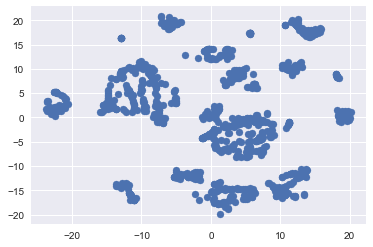

In [103]:
plt.scatter(x=components[:,0], y=components[:,1])